In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
pd.set_option('display.width', 2000)

  Condition  Ch2Intensity
0        N3     59.473813
1        WT     68.034665


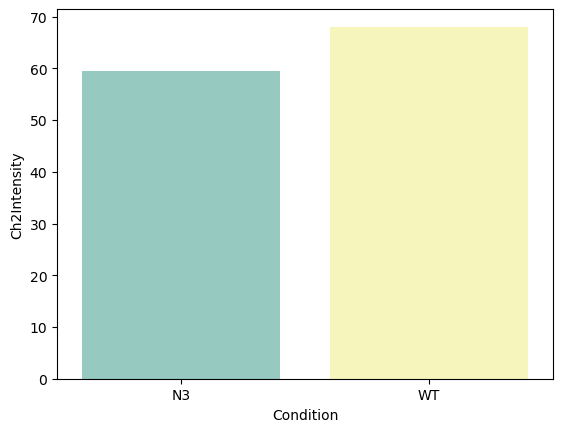

In [4]:
nucleus_df = pd.read_csv('csv/nuclei_mouzuna.csv')

mean_intensity = nucleus_df.groupby('Condition')['Ch3Intensity'].mean().reset_index()

print(mean_intensity)

# Plotting
sns.barplot(data=mean_intensity, x='Condition', y='Ch2Intensity', palette='Set3')
plt.show()

In [15]:
import napari
from statsmodels.stats.multicomp import MultiComparison
from sklearn.cluster import KMeans
import numpy as np
all_sorted_clusters = []
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    list = df['Ch3Intensity']
    intensity_values_reshaped = np.array(list).reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
    clusters = kmeans.fit_predict(intensity_values_reshaped)
    sorted_clusters = np.argsort(kmeans.cluster_centers_.flatten())
    all_sorted_clusters.append(sorted_clusters)



common_ordering = np.argsort(np.mean(all_sorted_clusters, axis=0))

# Assign consistent cluster labels based on the common ordering
consistent_labels = {common_ordering[0]: 0, common_ordering[1]: 1}

nucleus_df['Cluster_Label'] = np.nan
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    intensity_values = df['Ch3Intensity'].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto", init=kmeans.cluster_centers_[common_ordering].reshape(-1, 1))
    clusters = kmeans.fit_predict(intensity_values)
    nucleus_df.loc[df.index, 'Cluster_Label'] = [consistent_labels[cluster] for cluster in clusters]

cd86_df = nucleus_df[nucleus_df['Cluster_Label'] == 1]
img1_df = cd86_df[cd86_df['ImageName'] == 'P8 N3 2063 (33) BRAIN1 S1.lsm']

centroids = img1_df['Centroid'].apply(eval)

# Convert centroids to a NumPy array
centroids_array = np.array(centroids.tolist())  # Transpose the array to get the desired shape

# Check the shape of the centroids array

from skimage import io
img= io.imread("D:/Users\Jonas/nuclei\imagesAndMasks\Mouzuna/n3\P8 N3 2063 (33) BRAIN1 S1.lsm")

print(img.shape)

viewer = napari.view_image(img, scale =([0.9278, 0.3459, 0.3459]), channel_axis=3 )
viewer.add_points(centroids_array, size=10, symbol='cross', edge_color='blue', face_color='blue', name='Nuclei Centroids', scale=([0.9278, 0.3459, 0.3459]))
napari.run()
grouped_df = nucleus_df.groupby(['ImageName', 'Condition', 'Cluster_Label']).size().unstack(fill_value=0)

# Reset index to make 'ImageName', 'Condition', and 'Cluster_Label' as columns
grouped_df.reset_index(inplace=True)
print(grouped_df)

(18, 5925, 4947, 4)
Cluster_Label                      ImageName Condition   0.0   1.0
0              P8 N3 2063 (33) BRAIN1 S1.lsm        N3  8814  4814
1              P8 N3 2063 (33) BRAIN1 S2.lsm        N3  5675  4038
2              P8 N3 2063 (33) BRAIN2 S1.lsm        N3  6975  3906
3              P8 N3 2063 (33) BRAIN2 S2.lsm        N3  5629  3997
4              P8 N3 2063 (35) BRAIN1 S1.lsm        N3  6523  3339
5              P8 N3 2063 (35) BRAIN1 S2.lsm        N3  5977  2399
6              P8 N3 2063 (35) BRAIN2 S1.lsm        N3  6312  4385
7              P8 N3 2063 (35) BRAIN2 S2.lsm        N3  6269  3394
8              P8 N3 2063 (36) BRAIN1 S1.lsm        N3  4597  3404
9              P8 N3 2063 (36) BRAIN1 S2.lsm        N3  7459  2977
10             P8 N3 2063 (36) BRAIN2 S1.lsm        N3  4991  2925
11             P8 N3 2063 (36) BRAIN2 S2.lsm        N3  4962  3416
12              P8 WT 2063 (1) brain1 S1.lsm        WT  7744  4927
13              P8 WT 2063 (1) brain1 S2.l

In [16]:
print(cd86_df)

       Condition                      ImageName  Label    Area                                           Centroid CellType   Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity  gfpPositive  Cluster_Label
0             WT   P8 WT 2063 (1) brain1 S1.lsm      1  1228.0  (8.122964169381108, 1848.7858306188925, 532.88...   Neuron  Undefined     65.783388    172.130293    113.917752    179.015472          NaN            1.0
8             WT   P8 WT 2063 (1) brain1 S1.lsm      9  1693.0  (3.780862374483166, 5628.337861783816, 1444.90...   Neuron  Undefined      6.024217     57.477850     85.911991    166.259303          NaN            1.0
10            WT   P8 WT 2063 (1) brain1 S1.lsm     11  2483.0  (3.25332259363673, 4429.225936367297, 399.7579...   Neuron  Undefined     30.064438     94.829239     86.688280    187.090213          NaN            1.0
11            WT   P8 WT 2063 (1) brain1 S1.lsm     12  1205.0  (5.397510373443984, 3463.4215767634855, 1408.0...   Neuron  Unde

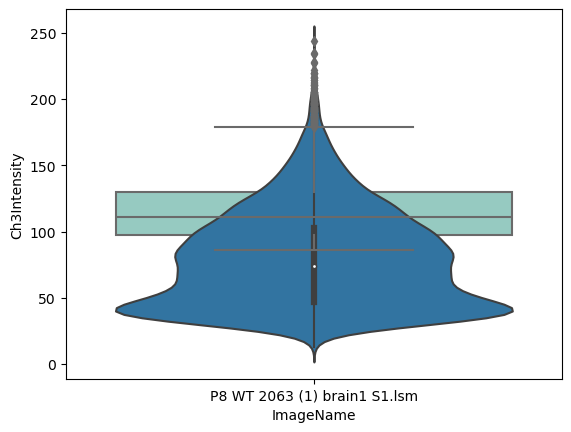

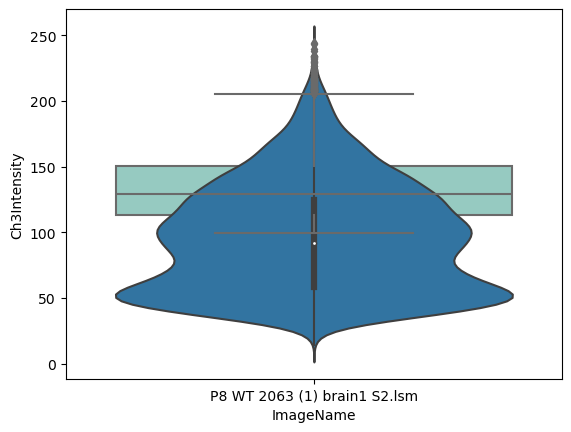

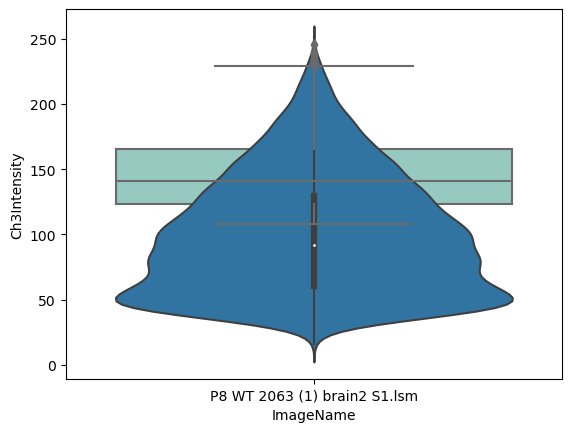

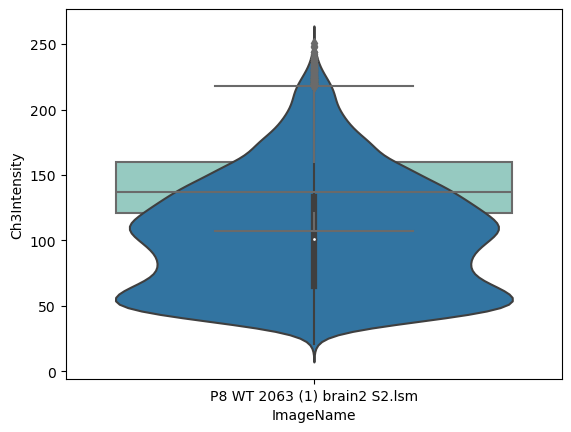

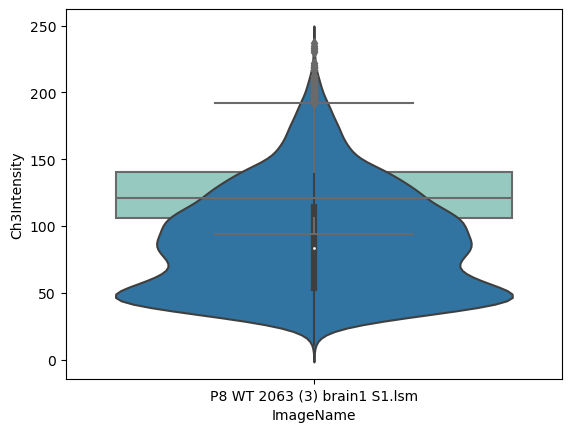

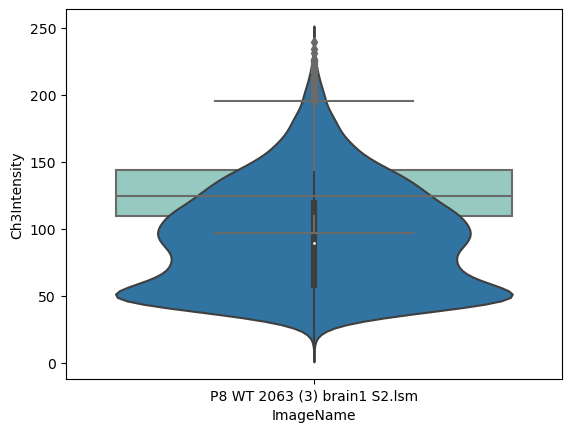

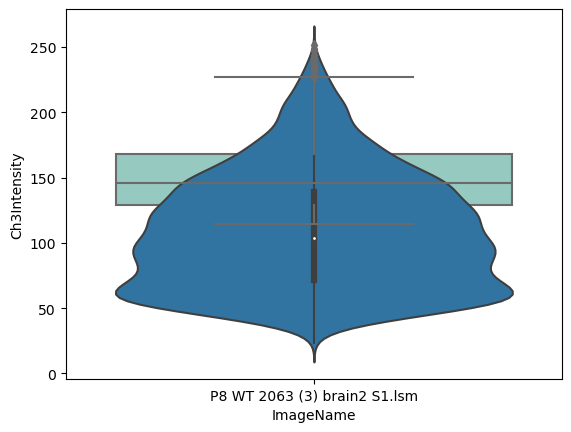

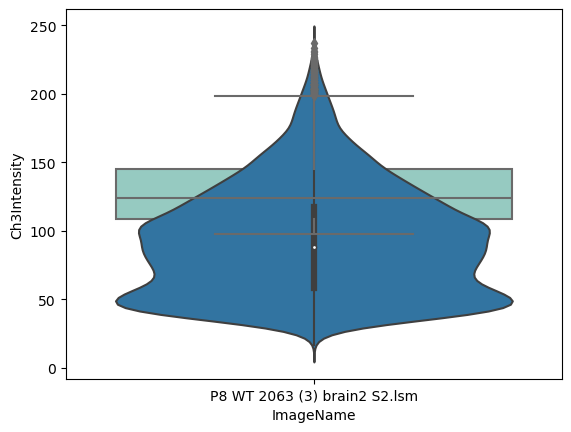

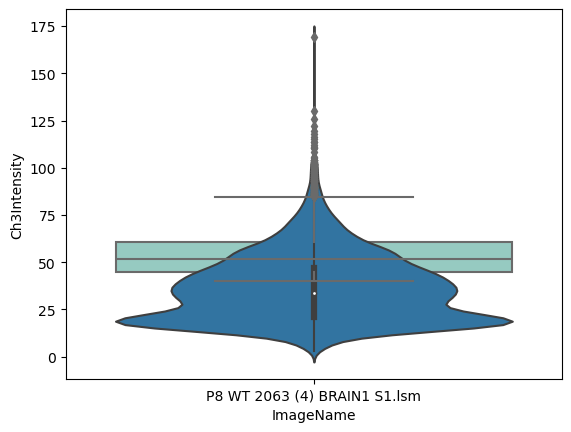

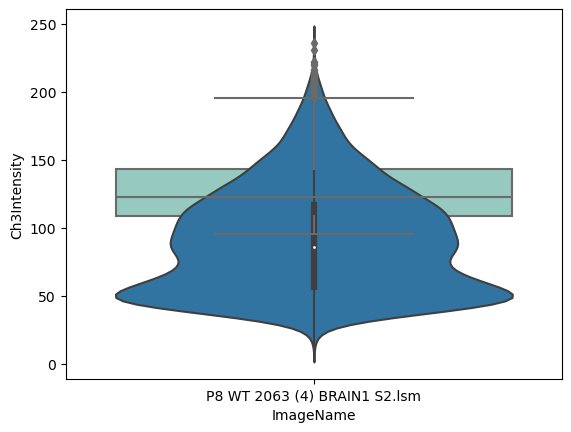

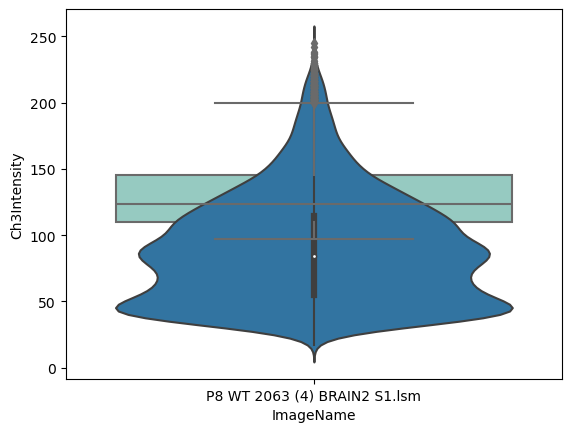

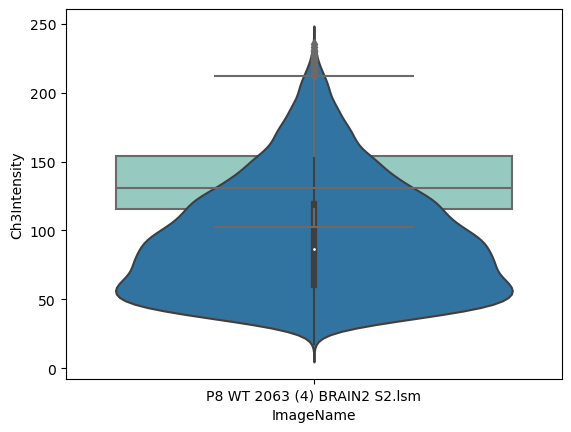

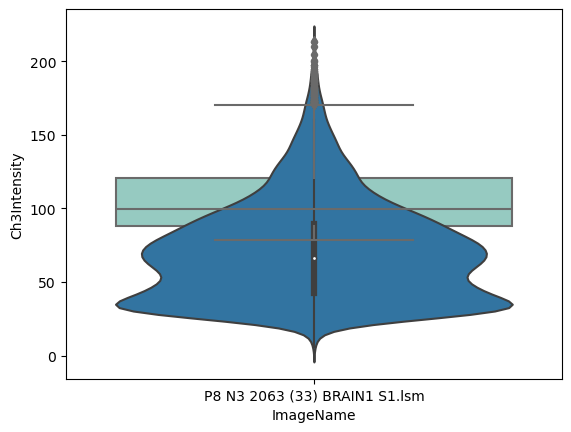

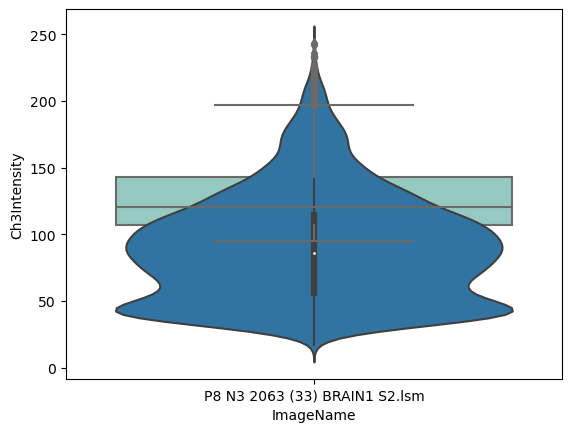

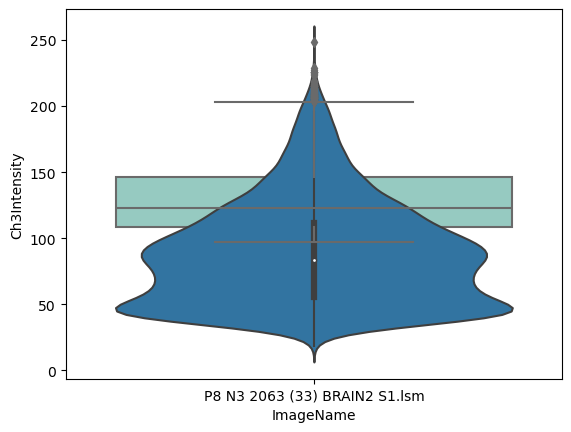

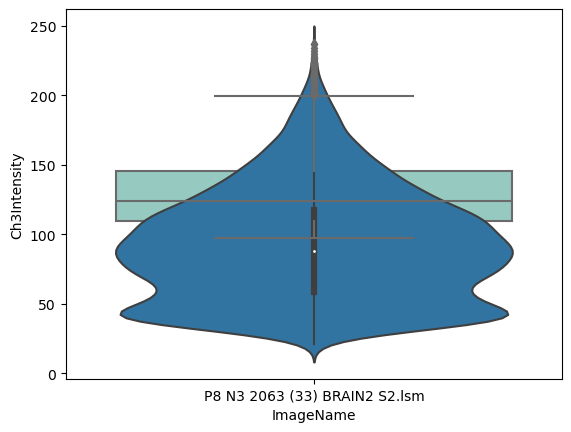

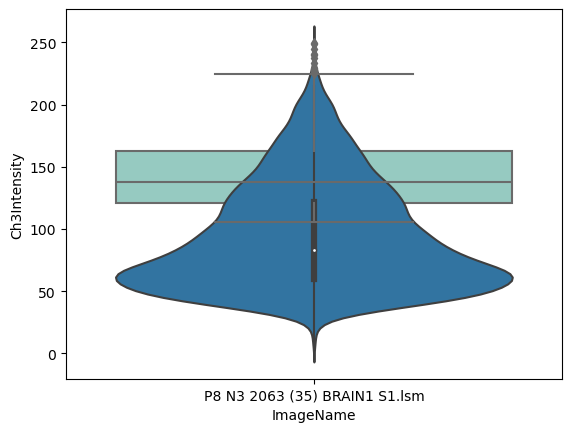

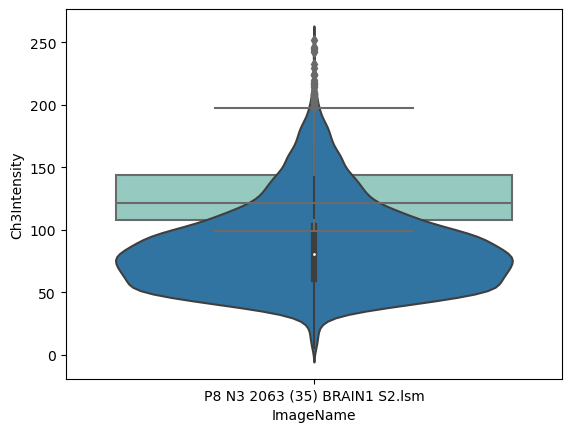

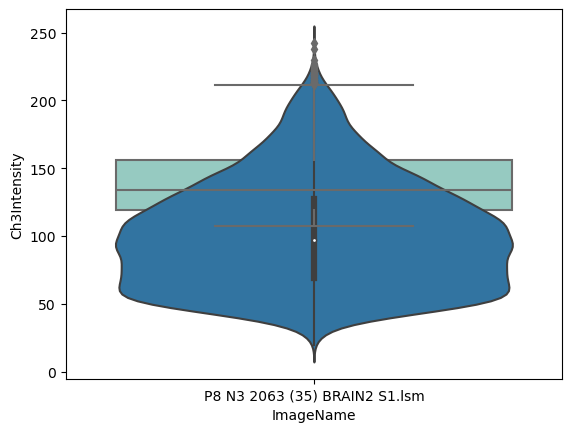

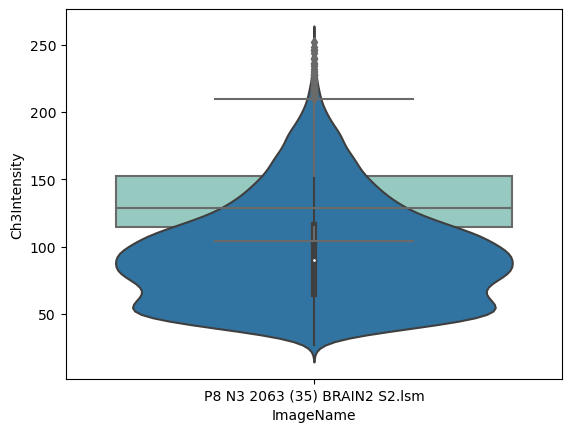

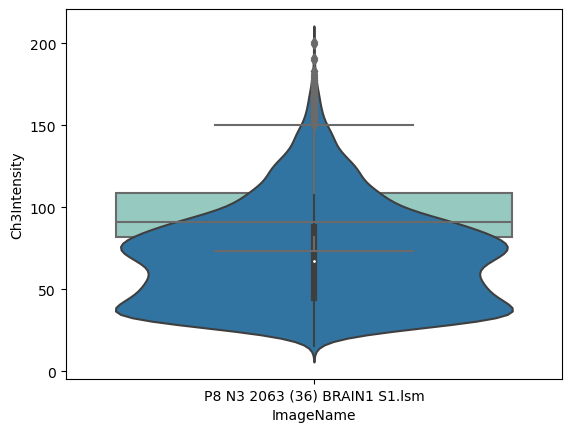

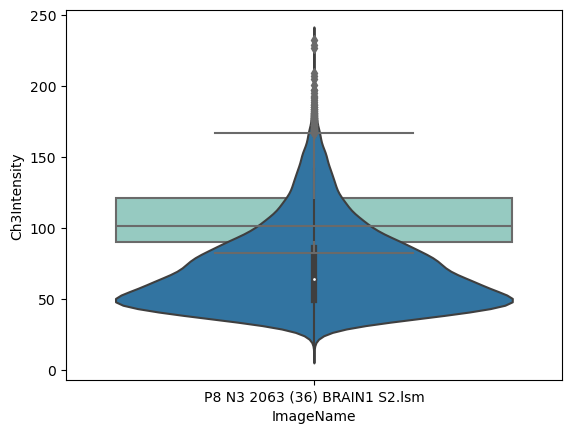

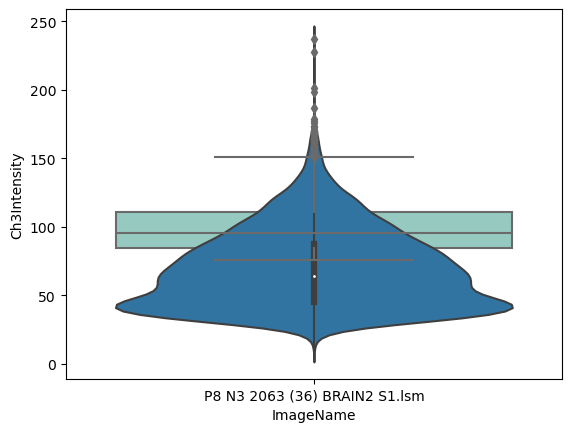

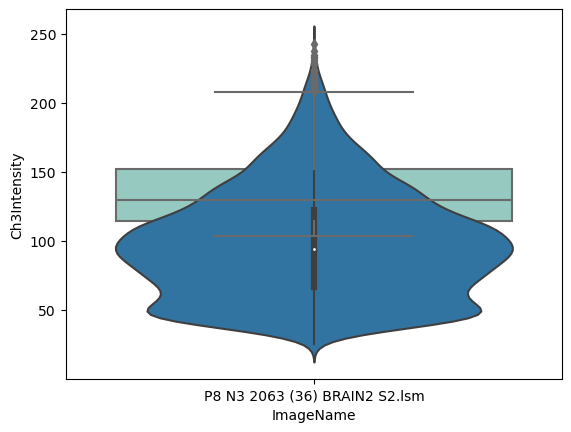

In [20]:
for name in nucleus_df['ImageName'].unique():
    df = nucleus_df[nucleus_df['ImageName'] == name]
    df2 = cd86_df[cd86_df['ImageName']== name]
    sns.violinplot(data=df, x='ImageName', y='Ch3Intensity')
    sns.boxplot(data=df2, x='ImageName',y='Ch3Intensity', palette='Set3')

    plt.show()